# Enhanced Deep Residual Networks for Single Image Super-Resolution

In [2]:
# 그림을 실행한 브라우저에서 바로 볼 수 있도록
%matplotlib inline

# 구현에 필요한 모듈 import
import os
import matplotlib.pyplot as plt
from data import DIV2K
from model.edsr import edsr
from train import EdsrTrainer

In [2]:
# Residual Blocks의 개수
depth = 16

# Super-resolution scale_factor
scale = 4

# Bicubic interpolation을 이용해서image downgrade
downgrade = 'bicubic'

In [3]:
# Model의 weight위치 지정

# weights_file = weights directory 밑에 'edsr-16-x4' 밑에 'weights.h5'파일 만들기
# weights_file 은 trainer.model.save_weights할때 사용
weights_dir = f'weights/edsr-{depth}-x{scale}'
weights_file = os.path.join(weights_dir, 'weights.h5')

# True로 생성하면 해당 파라미터(weights_dir)가 기존에 존재하면 에러없이 넘어가고, 존재하지 않으면 생성
os.makedirs(weights_dir, exist_ok=True)

## Datasets
- DIV2K dataset을 사용
 - 001.png ~ 800.png 이미지는 train set으로 사용
 - 801.png ~ 900.png 이미지는 validation set으로 사용

In [4]:
div2k_train = DIV2K(scale=scale, subset='train', downgrade=downgrade)
div2k_valid = DIV2K(scale=scale, subset='valid', downgrade=downgrade)

In [5]:
# train dataset 다운로드
train_ds = div2k_train.dataset(batch_size=16, random_transform=True) # repeat_count = None , It is Default

# validation dataset 다운로드
valid_ds = div2k_valid.dataset(batch_size=1, random_transform=False, repeat_count=1)

246915072/246914039 [==============================] - 125s 1us/step
Caching decoded images in .div2k/caches\DIV2K_train_LR_bicubic_X4.cache ...
Cached decoded images in .div2k/caches\DIV2K_train_LR_bicubic_X4.cache.
3530604544/3530603713 [==============================] - 1108s 0us/step
Caching decoded images in .div2k/caches\DIV2K_train_HR.cache ...
Cached decoded images in .div2k/caches\DIV2K_train_HR.cache.
31506432/31505881 [==============================] - 21s 1us/step
Caching decoded images in .div2k/caches\DIV2K_valid_LR_bicubic_X4.cache ...
Cached decoded images in .div2k/caches\DIV2K_valid_LR_bicubic_X4.cache.
448995328/448993893 [==============================] - 220s 0us/step
Caching decoded images in .div2k/caches\DIV2K_valid_HR.cache ...
Cached decoded images in .div2k/caches\DIV2K_valid_HR.cache.


In [7]:
print(type(train_ds))
print(type(valid_ds))

<class 'tensorflow.python.data.ops.dataset_ops.PrefetchDataset'>
<class 'tensorflow.python.data.ops.dataset_ops.PrefetchDataset'>


## Training using EDSR

In [8]:
# EDSR Model 선언
trainer = EdsrTrainer(model=edsr(scale=scale, num_res_blocks=depth), 
                      checkpoint_dir=f'.ckpt/edsr-{depth}-x{scale}')

In [9]:
# 300,000 단계에 걸쳐서 EDSR모델을 훈련시키고, DIV2K의 validation set의 첫부분의 10개의 이미지에 대해서
# 1,000단계마다 모델을 평가합니다
# 모델을 평가할 대마다 checkpoint 저장
trainer.train(train_ds,
              valid_ds.take(10),
              steps=300000, 
              evaluate_every=1000, 
              save_best_only=True)

1000/300000: loss = 11.825, PSNR = 27.383442 (459.23s)
2000/300000: loss = 8.065, PSNR = 27.790634 (492.73s)
3000/300000: loss = 7.643, PSNR = 27.983530 (493.54s)
4000/300000: loss = 7.594, PSNR = 28.084354 (492.20s)
5000/300000: loss = 7.346, PSNR = 28.213482 (493.38s)
6000/300000: loss = 7.258, PSNR = 28.375177 (494.17s)
7000/300000: loss = 7.138, PSNR = 28.462372 (495.75s)
8000/300000: loss = 7.089, PSNR = 28.537418 (494.84s)
9000/300000: loss = 6.988, PSNR = 28.603725 (496.43s)
10000/300000: loss = 6.927, PSNR = 28.339375 (493.86s)
11000/300000: loss = 6.960, PSNR = 28.635555 (495.25s)
12000/300000: loss = 6.959, PSNR = 28.723139 (495.62s)
13000/300000: loss = 6.881, PSNR = 28.644451 (495.94s)
14000/300000: loss = 6.865, PSNR = 28.755829 (496.04s)
15000/300000: loss = 6.766, PSNR = 28.715509 (495.48s)
16000/300000: loss = 6.804, PSNR = 28.837381 (496.06s)
17000/300000: loss = 6.803, PSNR = 28.793499 (498.00s)
18000/300000: loss = 6.798, PSNR = 28.890345 (494.38s)
19000/300000: loss

150000/300000: loss = 6.330, PSNR = 29.362469 (510.98s)
151000/300000: loss = 6.392, PSNR = 29.333828 (511.73s)
152000/300000: loss = 6.354, PSNR = 29.368860 (511.71s)
153000/300000: loss = 6.315, PSNR = 29.336420 (515.47s)
154000/300000: loss = 6.367, PSNR = 29.370266 (512.56s)
155000/300000: loss = 6.361, PSNR = 29.374466 (513.88s)
156000/300000: loss = 6.363, PSNR = 29.353973 (513.05s)
157000/300000: loss = 6.353, PSNR = 29.354162 (512.53s)
158000/300000: loss = 6.358, PSNR = 29.376734 (511.20s)
159000/300000: loss = 6.330, PSNR = 29.330200 (510.21s)
160000/300000: loss = 6.338, PSNR = 29.386150 (512.88s)
161000/300000: loss = 6.358, PSNR = 29.367289 (510.34s)
162000/300000: loss = 6.316, PSNR = 29.373007 (509.93s)
163000/300000: loss = 6.313, PSNR = 29.371048 (509.86s)
164000/300000: loss = 6.302, PSNR = 29.367172 (510.24s)
165000/300000: loss = 6.342, PSNR = 29.358057 (511.31s)
166000/300000: loss = 6.318, PSNR = 29.372112 (512.38s)
167000/300000: loss = 6.359, PSNR = 29.387527 (5

297000/300000: loss = 6.148, PSNR = 29.449429 (530.09s)
298000/300000: loss = 6.270, PSNR = 29.461645 (523.95s)
299000/300000: loss = 6.252, PSNR = 29.434149 (521.45s)
300000/300000: loss = 6.258, PSNR = 29.439037 (524.45s)


In [10]:
# PSNR값이 가장 높은 체크포인트에서 복원
trainer.restore()

Model restored from checkpoint at step 296000.


In [11]:
# validation set을 이용해서 Model을 평가
psnrv = trainer.evaluate(valid_ds)
print(f'PSNR = {psnrv.numpy():3f}')

PSNR = 28.834938


In [12]:
# 가중치 저장
trainer.model.save_weights(weights_file)

## Demo

In [13]:
model = edsr(scale=scale, num_res_blocks=depth)
model.load_weights(weights_file)

In [14]:
from model import resolve_single
from utils import load_image, plot_sample

def resolve_and_plot(lr_image_path):
    lr = load_image(lr_image_path)
    sr = resolve_single(model, lr)
    plot_sample(lr, sr)

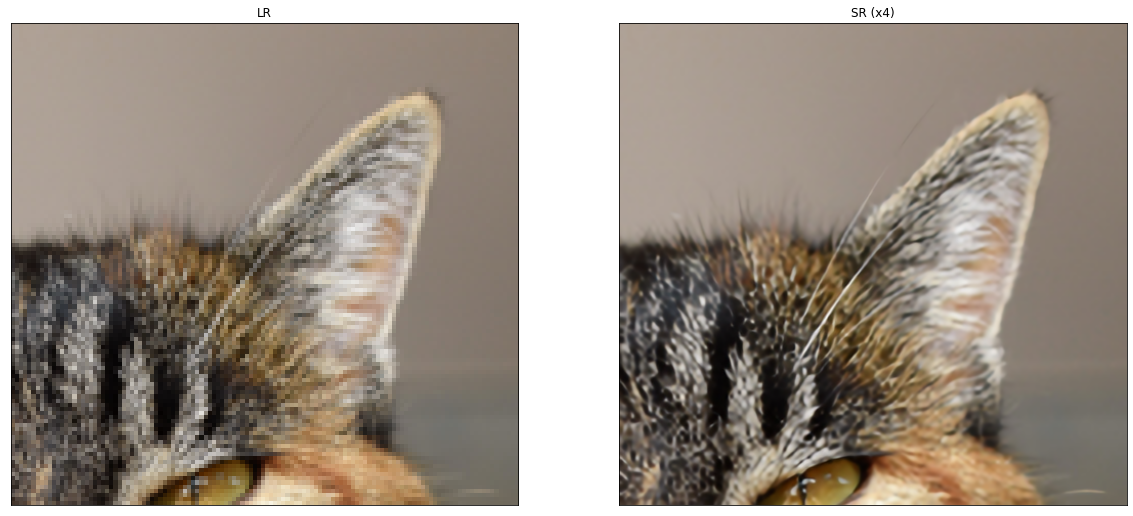

In [15]:
resolve_and_plot('demo/0869x4-crop.png')

In [16]:
resolve_and_plot('demo/0829x4-crop.png')

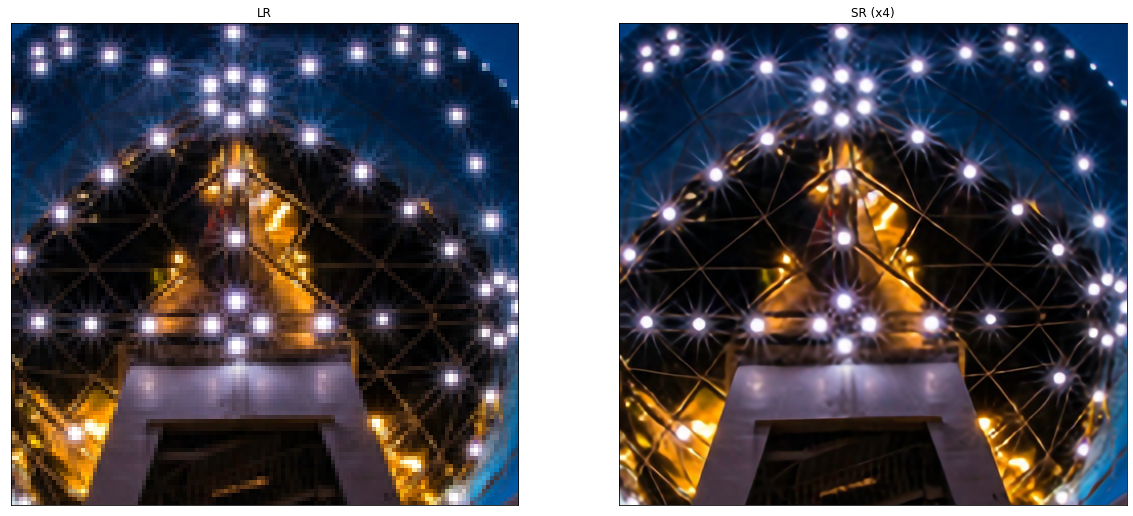

In [17]:
resolve_and_plot('demo/0851x4-crop.png')